# Outlier

- Outliers are values in the data set that are very large or small compared to the majority of the values in the data set. For example, 767 is an outlier in the following data set (130,160,110,49,95,93,120,179,767).

- The machine learning model performance depends on how clean your data is. Even the best machine learning algorithm will not perform well if outliers are present in the data. Outliers affect the training process of a machine learning model, and results can be inaccurate.

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r"data\jobselection.csv")

In [73]:
df

,score,exam_marks,seleted
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


## Detecting the Outliers

**Detecting outliers with Visualization**


- The easiest way to see the outliers is by using a box plot. A box has two main components a `box` and two `whiskers`. The whiskers represent the data outside the middle 50% of the data. Data values that lie outside the whiskers are considered outliers.

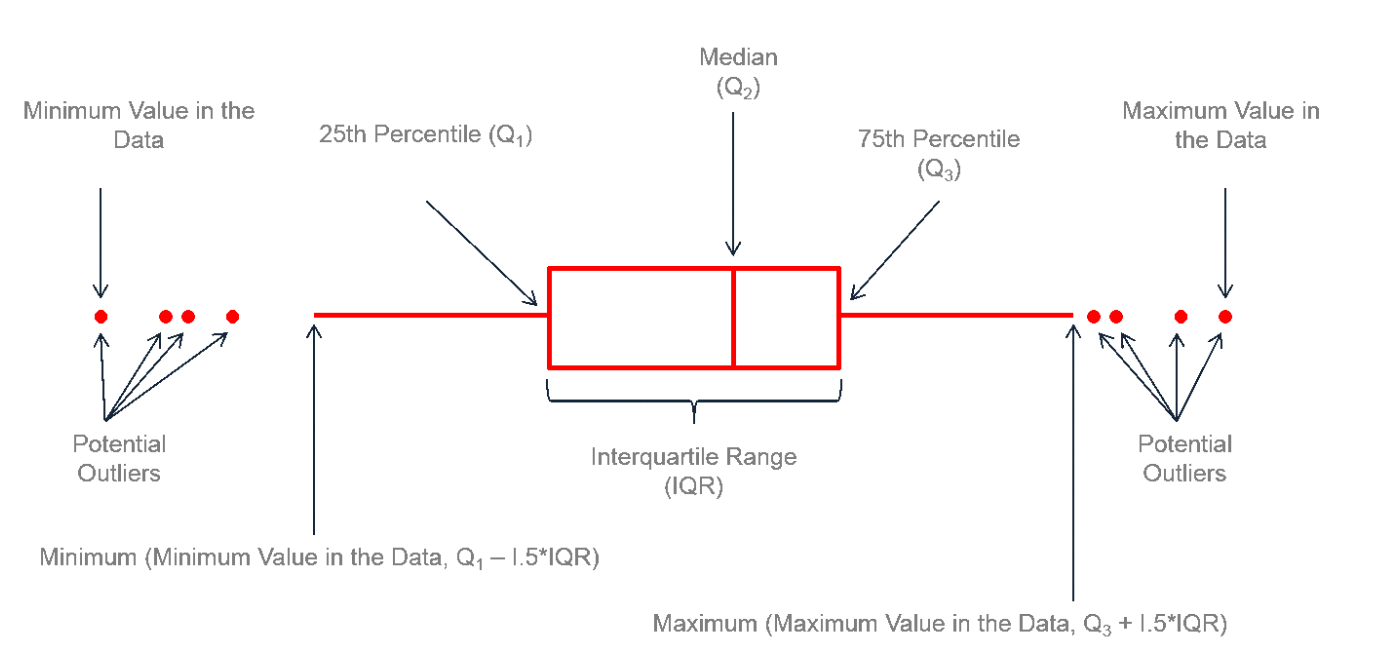

<AxesSubplot:>

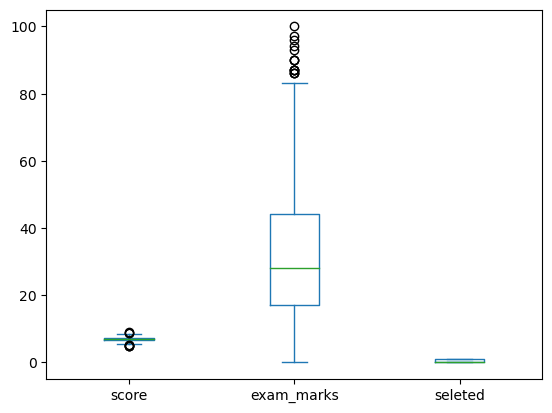

In [74]:
df.plot(kind="box")

<AxesSubplot:>

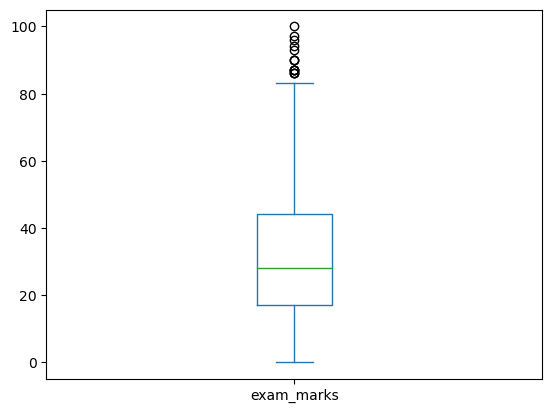

In [75]:
df["exam_marks"].plot(kind="box")

- The marks above 83 opprox in the marks column are outliers

**Detecting outliers with Interquartile Range (IQR)**


- In statistics, the interquartile range is a measure of statistical dispersion, which describes the variability in data. To find an IQR, we calculate Q1 and Q3 values then find the IQR by subtracting Q3 from Q1. Q3 is the 75th percentile, and Q1 is the 25th percentile.

- To find Q3 and Q1, we use Pandas quantile method and pass 0.75 and 0.25 values which are 75th and 25th percentile.

In [76]:
df["exam_marks"].min()

0

In [77]:
df["exam_marks"].max()

100

In [78]:
Q1=df["exam_marks"].quantile(0.25)

In [79]:
Q1

17.0

In [80]:
Q3=df["exam_marks"].quantile(0.75)

In [81]:
Q3

44.0

**Calculating IQR**

In [82]:
IQR=Q3-Q1

In [83]:
IQR

27.0

- Now we will use IQR Method.

**Lower Outlier = Q1-(1.5 x IQR)**

**Upper Outlier =Q3-(1.5 x IQR)**

- A resulting value from these formulas that is greater than a higher outlier, and less than a lower outlier is considered as an outlier.

In [84]:
Higher_outlier = Q1 + (IQR * 1.5)
lower_outlier = Q3 - (IQR * 1.5)
print(Higher_outlier)
print(lower_outlier)

57.5
3.5


- We got 57.5 and 3.5 values. Let’s check how many outliers are in the marks column.

In [86]:
df[(df["exam_marks"] <= lower_outlier) | (df["exam_marks"] >= Higher_outlier)]  

,score,exam_marks,seleted
9,7.75,94,1
25,6.28,58,1
40,6.60,86,1
42,7.46,71,1
43,7.85,63,0
...,...,...,...
966,6.24,72,1
967,7.35,59,0
987,6.77,62,0
994,6.48,63,0


- these are the outliers in the marks column.
- shape of the dataframe is (120,3).

## Treating Outlier

- So far, we have detected the outliers, and we will Treat them.

- In Treating outliers we have two methods
  - Trimming
  - Capping

**Trimming**

- trimming is a technique to remove outliers from the dataframe.

In [88]:
df_trim=df[(df["exam_marks"] > lower_outlier) & (df["exam_marks"] < Higher_outlier)]

- all the outliers in marks are removed from the above dataframe 
- Shape of the dataframe after removing outliers is (880,3)

<AxesSubplot:>

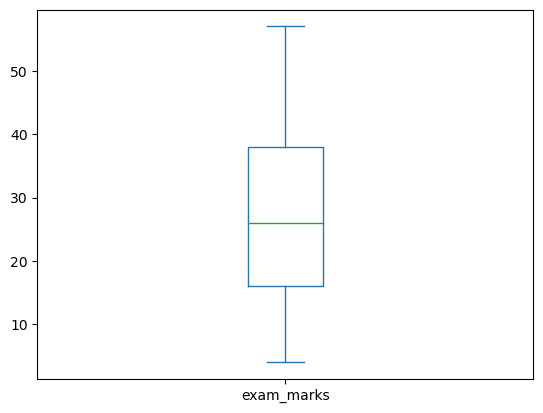

In [89]:
df_trim["exam_marks"].plot(kind="box")

**Capping**

- Capping is a method where we bring the outliers to the their lower|uper limits.

In [90]:
df["exam_marks"] = df["exam_marks"].apply(lambda x : lower_outlier if x < lower_outlier  else  Higher_outlier  if x > Higher_outlier else x)

In [91]:
df

,score,exam_marks,seleted
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,57.5,1
997,4.89,34.0,0
998,8.62,46.0,1


- All outliers are removed in the marks column
- Shape of the dataframe is still same as original (1000,3)

<AxesSubplot:>

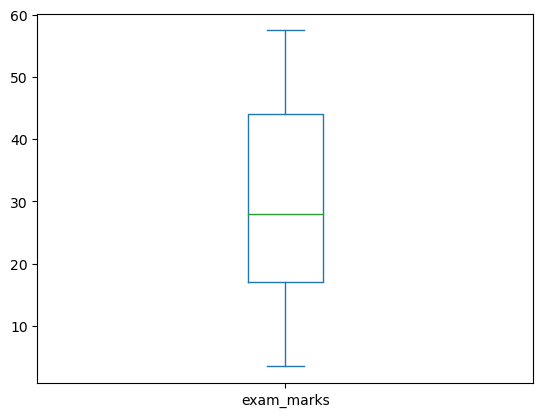

In [93]:
df["exam_marks"].plot(kind="box")